# Linear Regression

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load datasets
eth_df = pd.read_csv('ETH-USD.csv')

# Convert 'Date' column to datetime
eth_df['Date'] = pd.to_datetime(eth_df['Date'])

# Set 'Date' column as index
eth_df.set_index('Date', inplace=True)
# Define the lookback period and initialize a MinMaxScaler
lookback = 60
scaler = MinMaxScaler(feature_range=(0, 1))

def create_dataset(df):
    '''
    Convert the dataframe into two numpy arrays X and y
    X is the input variables, y is the output variable
    '''
    data = df.values
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])  # predict the next Close price
    return np.array(X), np.array(y)

# Select the features we want to use
features = ['Close', 'Open', 'High', 'Low', 'Volume']
eth_df_feature = eth_df[features]

# Scale the features
eth_df_scaled = scaler.fit_transform(eth_df_feature.values)

# Create the dataset
X, y = create_dataset(eth_df_scaled)

# Split into training and testing datasets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, mae, rmse


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [22]:
def create_dataset(data):
    '''
    Convert the data into two numpy arrays X and y
    X is the input variables, y is the output variable
    '''
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])  # predict the next Close price
    return np.array(X), np.array(y)

# Create the dataset
X, y = create_dataset(eth_df_scaled)

# Split into training and testing datasets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, mae, rmse


ValueError: Found array with dim 3. Estimator expected <= 2.

In [23]:
# Reshape the input data to 2D
X_train_2D = X_train.reshape(X_train.shape[0], -1)
X_test_2D = X_test.reshape(X_test.shape[0], -1)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_2D, y_train)

# Make predictions
y_pred = model.predict(X_test_2D)

# Compute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, mae, rmse


(0.001356133489033879, 0.025769316391504832, 0.03682571776671677)

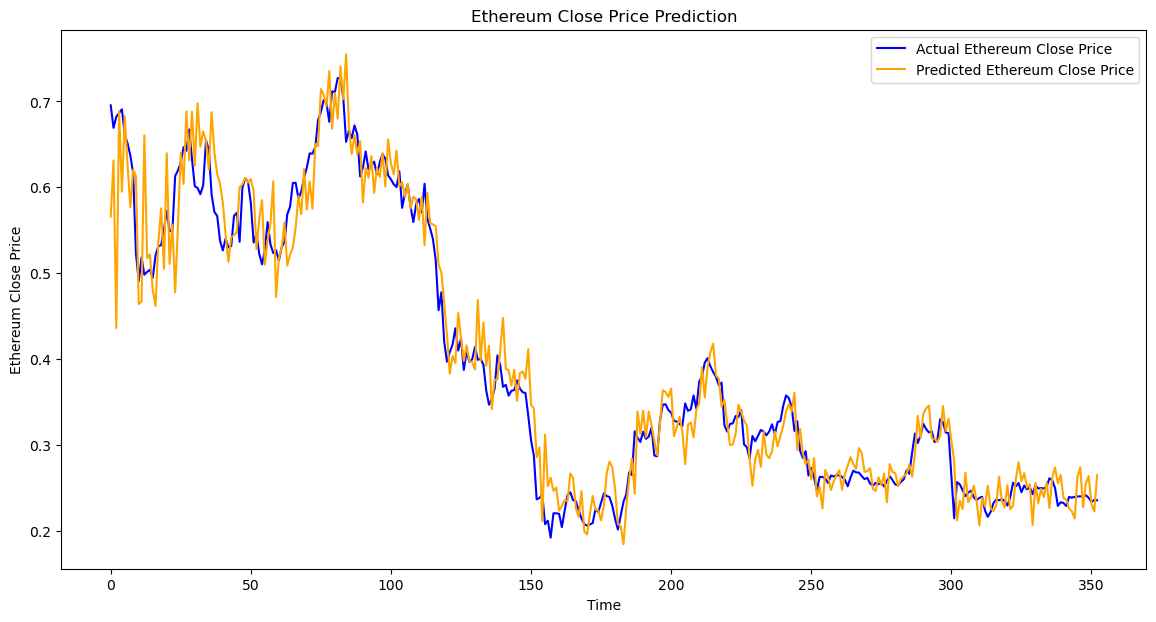

In [24]:
# Plot actual vs predicted values
plt.figure(figsize=(14,7))
plt.plot(y_test, color='blue', label='Actual Ethereum Close Price')
plt.plot(y_pred, color='orange', label='Predicted Ethereum Close Price')
plt.title('Ethereum Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Ethereum Close Price')
plt.legend()
plt.show()


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Reshape data to 2D
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

# Define the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train_rf, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test_rf)

# Compute error
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

mse_rf, mae_rf, rmse_rf


(0.0011432475101111957, 0.027679433700006896, 0.033811943305749166)

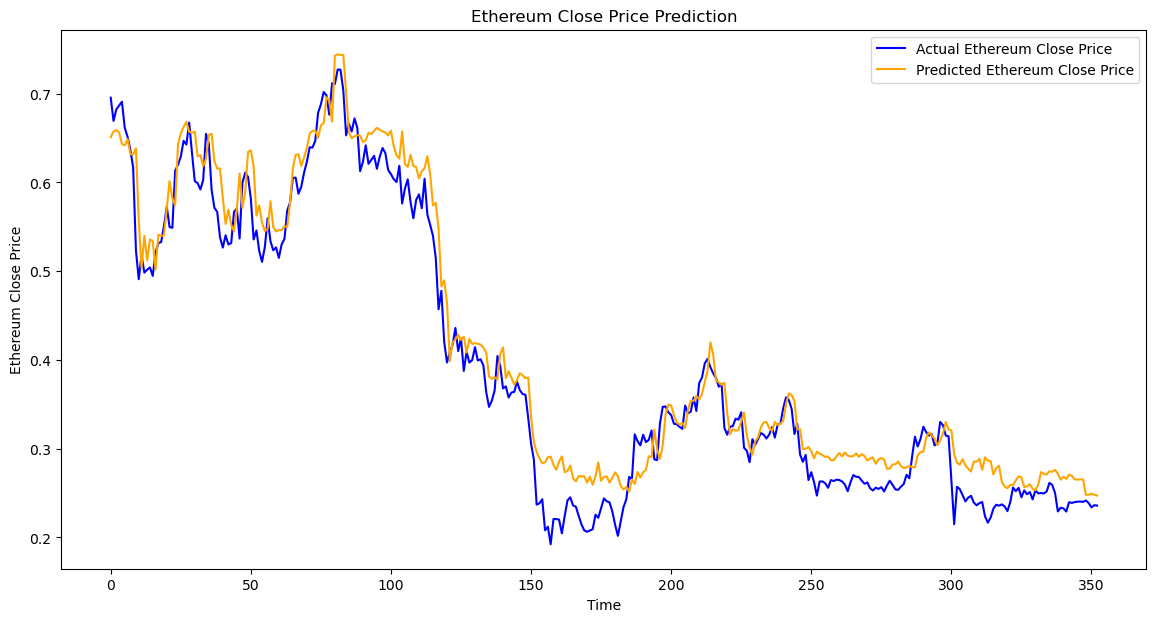

In [26]:
# Plot actual vs predicted values
plt.figure(figsize=(14,7))
plt.plot(y_test, color='blue', label='Actual Ethereum Close Price')
plt.plot(y_pred_rf, color='orange', label='Predicted Ethereum Close Price')
plt.title('Ethereum Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Ethereum Close Price')
plt.legend()
plt.show()


# XGBOOST

In [27]:
from xgboost import XGBRegressor

# Define the XGBoost model
model_xgb = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
model_xgb.fit(X_train_rf, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test_rf)

# Compute error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

mse_xgb, mae_xgb, rmse_xgb


(0.002200034519351893, 0.039627399520488917, 0.04690452557431844)

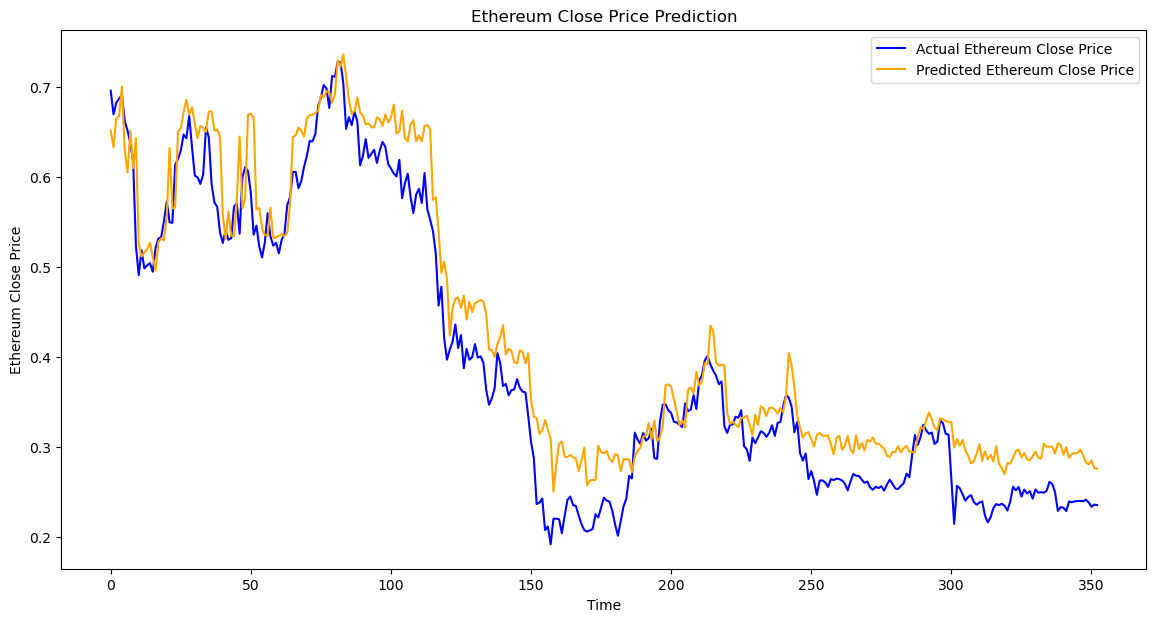

In [28]:
# Plot actual vs predicted values
plt.figure(figsize=(14,7))
plt.plot(y_test, color='blue', label='Actual Ethereum Close Price')
plt.plot(y_pred_xgb, color='orange', label='Predicted Ethereum Close Price')
plt.title('Ethereum Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Ethereum Close Price')
plt.legend()
plt.show()


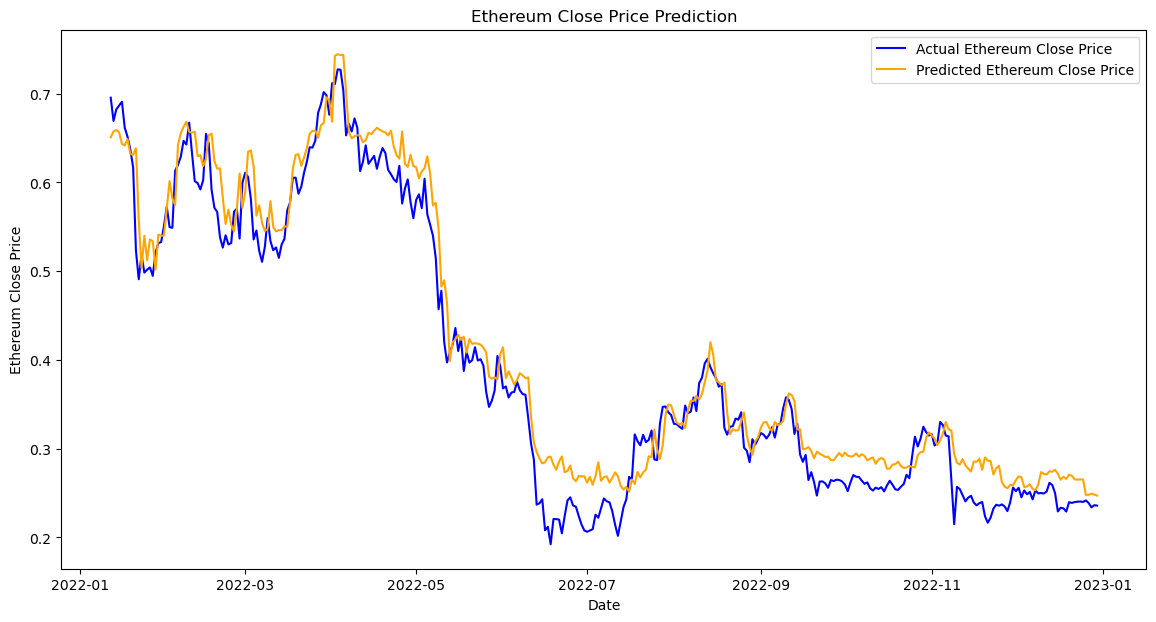

In [29]:
# Get the dates for the testing data
test_dates = eth_df.index[-len(y_test):]

# Plot actual vs predicted values
plt.figure(figsize=(14,7))
plt.plot(test_dates, y_test, color='blue', label='Actual Ethereum Close Price')
plt.plot(test_dates, y_pred_rf, color='orange', label='Predicted Ethereum Close Price')
plt.title('Ethereum Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Ethereum Close Price')
plt.legend()
plt.show()
